US Population Growth:
(a) First, I import the necessary libaries and csv. Then I used a while loop to calculate the years since the beginning year of 1790. To create the us population in millions we divide each row by 1 million.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
us_pop = pd.read_csv("C:\\Users\ILiem\\OneDrive - The Scoular Company\\Documents\\Bellevue\\Math for DS\\week3data\\week3data\\us_pop_data.csv")

us_pop["years_since_previous"] = 0
i = 0
while i < len(us_pop):
    us_pop.at[i, 'years_since_previous'] = us_pop.at[i, 'year'] - us_pop.at[0, 'year']
    i = i + 1

us_pop["us_pop_mil"] = us_pop["us_pop"]/1000000

(b) Created a line chart with matplotlib to show the population growth.

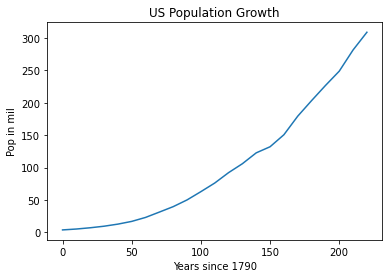

In [79]:
plt.plot(us_pop["years_since_previous"],us_pop["us_pop_mil"])
plt.title('US Population Growth')
plt.xlabel('Years since 1790')
plt.ylabel('Pop in mil')
plt.show()

(c) Create a linear regression model to get the proper slope and intercept value. Then plot the linear regression on the chart created on the previous chart.

In [81]:
from scipy import stats
slope, intercept, rvalue, p, se = stats.linregress(us_pop["years_since_previous"], us_pop["us_pop_mil"])
print('slope: {:.4f}'.format(slope))
print('intercept: {:.4f}'.format(intercept))

slope: 1.3596
intercept: -45.5679


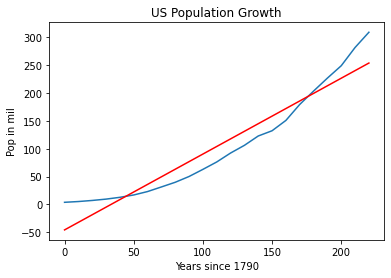

In [82]:
us_pop['lin_reg'] = (slope * us_pop["years_since_previous"]) + intercept
plt.plot(us_pop["years_since_previous"],us_pop["us_pop_mil"])
plt.title('US Population Growth')
plt.xlabel('Years since 1790')
plt.ylabel('Pop in mil')
plt.plot(us_pop["years_since_previous"],us_pop['lin_reg'], color='red')
plt.show()

(c) Find the R-squared value of the model using numpy.

In [83]:
correlation_matrix = np.corrcoef(us_pop["years_since_previous"], us_pop["us_pop_mil"])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R-Squared Value:\n",r_squared)

R-Squared Value:
 0.9192437447080442


(d) Squared the number of years using numpy

In [84]:
us_pop["years_squared"] = np.square(us_pop["years_since_previous"])

(e) Created a new regression line on the years squared then visualized.

In [85]:
slope, intercept, rvalue, p, se = stats.linregress(us_pop["years_squared"], us_pop["us_pop_mil"])
print('slope: {:.4f}'.format(slope))
print('intercept: {:.4f}'.format(intercept))

slope: 0.0062
intercept: 1.3604


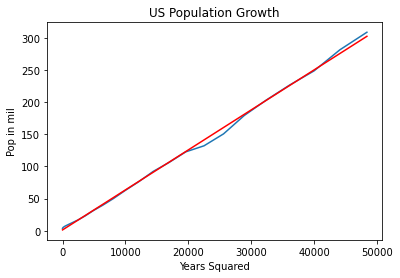

In [86]:
us_pop['lin_reg_sq'] = (slope * us_pop["years_squared"]) + intercept
plt.plot(us_pop["years_squared"],us_pop["us_pop_mil"])
plt.title('US Population Growth')
plt.xlabel('Years Squared')
plt.ylabel('Pop in mil')
plt.plot(us_pop["years_squared"],us_pop['lin_reg_sq'], color='red')
plt.show()

(e) Find the r-squared value of the years squared using numpy and plotted.

In [87]:
correlation_matrix = np.corrcoef(us_pop["years_squared"], us_pop["us_pop_mil"])
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("R-Squared Value:\n",r_squared)

R-Squared Value:
 0.9984915694986647


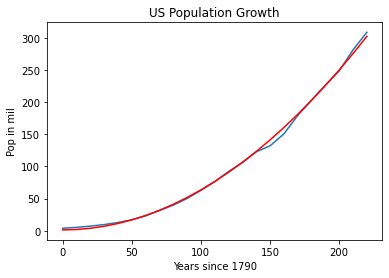

In [89]:
plt.plot(us_pop["years_since_previous"],us_pop["us_pop_mil"])
plt.title('US Population Growth')
plt.xlabel('Years since 1790')
plt.ylabel('Pop in mil')
plt.plot(us_pop["years_since_previous"],us_pop['lin_reg_sq'], color='red')
plt.show()

(f) The r-squared value is closer to 1 (.919 vs .998), which means that the model using the squared years is a better fit. Also, it can be confirmed by visualization that the linear regression model of the years squared fits the plotting of the population data better.

Customer Spending Data: (a) Import the customer spending csv and create a histogram of the current data.

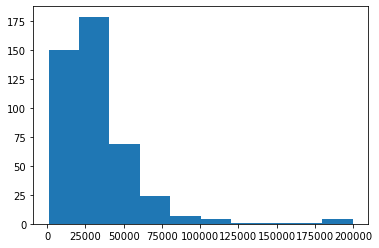

In [90]:
customer_spending = pd.read_csv("C:\\Users\ILiem\\OneDrive - The Scoular Company\\Documents\\Bellevue\\Math for DS\\week3data\\week3data\\customer_spending.csv")

plt.hist(customer_spending)
plt.show()

(b) Created a new dataframe in pandas using the log of the spending data from the customer spending spreadsheet. 
(c) Visualized the new data using a histogram.

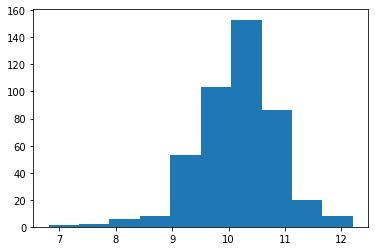

In [91]:
log_spending = pd.DataFrame(np.log(customer_spending["ann_spending"]))
plt.hist(log_spending)
plt.show()

(d) The distibution is much more clear using the log transformation. This is because it reduces the variability of the data. We should use log transformation to create a normal bell curve. In this dataset there are quite a few outliers which skews the model to the left, the log transformation helps reduce those outliers.